# Customer Attrition Analysis

## OVERVIEW

### Verizonet, a California-based telecommunications company, faces a significant customer attrition 
### challenge attributed to competitor advancements in technology and network coverage. To combat 
### this issue, a multifaceted approach has been initiated, involving a cross-functional task force 
### and a newly formed Data Science team.

## OBJECTIVE
### The primary objective is to leverage data science methodologies to build a predictive 
### model for customer attrition. By analyzing historical patterns, identifying influential
### factors, and implementing machine learning algorithms, the aim is to provide actionable 
### insights and personalized retention strategies, ultimately reducing customer attrition and 
### contributing to the company's sustained growth and financial stability.

## The project is structured as follows:

### 1.Exploratory Data Analysis
### 2.Data Preprocessing
### 3.Model Creation and Evaluation
### 4.Feature Importance Analysis

# EXPLORATORY DATA ANALYSIS 

In [554]:
import numpy as np
import pandas as pd

In [555]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [556]:
df = pd.read_csv("verizonet_data.csv")

In [557]:
df.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,...,Los Angeles,90022,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,Los Angeles,90063,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,Los Angeles,90065,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,Inglewood,90303,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,Whittier,90602,26265,1,2793,Price,Extra data charges,1,0,2.0


In [593]:
df.shape # no. of rows and no. of Columns)

(7043, 43)

In [592]:
df.info()      #  method used to print a concise summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              3166 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      5517 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [597]:
df.columns

Index(['Customer ID', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Regular Charges',
       'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Gender', 'Age', 'Under 30',
       'Senior Citizen', 'Married', 'Dependents', 'City', 'Zip Code',
       'Population', 'Churn Status', 'CLTV', 'Churn Category', 'Churn Reason',
       'Total Customer Svc Requests', 'Product/Service Issues Reported',
       'Customer Satisfaction rate'],
      dtype='object')

In [598]:
df.dtypes

Customer ID                           object
Referred a Friend                     object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download                int64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract                              object
Paperless Billing                     object
Payment Method                        object
Monthly Ch

# DATA PREPROCESSING

In [594]:
df.isnull().sum() # checking for missing values

Customer ID                             0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                          0
Monthly Charge                          0
Total Regular Charges             

In [599]:
df.duplicated().sum()  # To find duplicates


0

In [559]:
#descriptive statistics of a DataFrame. 
df.describe(include='number') 

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Zip Code,Population,Churn Status,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1834.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,93486.070567,22139.603294,0.265370,4400.295755,1.338776,0.308107,3.005453
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,1856.767505,21152.392837,0.441561,1183.057152,1.430471,0.717514,1.256938
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,90001.000000,11.000000,0.000000,2003.000000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,92101.000000,2344.000000,0.000000,3469.000000,0.000000,0.000000,2.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,93518.000000,17554.000000,0.000000,4527.000000,1.000000,0.000000,3.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,95329.000000,36125.000000,1.000000,5380.500000,2.000000,0.000000,4.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,96150.000000,105285.000000,1.000000,6500.000000,9.000000,6.000000,5.000000


In [560]:
df['Churn Reason'].unique() # unique features

array(['Competitor offered more data', 'Competitor made better offer',
       'Limited range of services', 'Extra data charges',
       'Competitor had better devices', "Don't know",
       'Service dissatisfaction',
       'Lack of affordable download/upload speed',
       'Product dissatisfaction', 'Long distance charges',
       'Poor expertise of online support', 'Attitude of support person',
       'Network reliability', 'Competitor offered higher download speeds',
       'Moved', 'Price too high', 'Attitude of service provider',
       'Poor expertise of phone support', 'Deceased', nan,
       'Lack of self-service on Website'], dtype=object)

In [561]:
df['Churn Category'].unique()

array(['Competitor', 'Dissatisfaction', 'Price', 'Other', 'Attitude', nan],
      dtype=object)

In [562]:
# unique values in each feature and its length
df.nunique()

Customer ID                          7043
Referred a Friend                       2
Number of Referrals                    12
Tenure in Months                       72
Offer                                   5
Phone Service                           2
Avg Monthly Long Distance Charges    3584
Multiple Lines                          2
Internet Service                        2
Internet Type                           3
Avg Monthly GB Download                63
Online Security                         2
Online Backup                           2
Device Protection Plan                  2
Premium Tech Support                    2
Streaming TV                            2
Streaming Movies                        2
Streaming Music                         2
Unlimited Data                          2
Contract                                3
Paperless Billing                       2
Payment Method                          3
Monthly Charge                       2295
Total Regular Charges             

In [564]:
df['Churn Status'].value_counts()  # target variable

Churn Status
0    5174
1    1869
Name: count, dtype: int64

##### Target variable has imbalanced class distribution.
##### Churned class is much less than  not churned class. Imbalanced class distributions 
##### influence the performance of a machine learning model negatively. We will use upsampling or downsampling
##### to overcome this issue.

##### It is always beneficial to explore the features (independent variables) before trying to build a model.
##### Let's first discover the features that only have two values.

In [565]:
columns = df.columns
binary_cols= []
for col in columns:
    if df[col].value_counts().shape[0]==2:
         binary_cols.append(col)


In [566]:
binary_cols # categorical features with two classes

['Referred a Friend',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Paperless Billing',
 'Gender',
 'Under 30',
 'Senior Citizen',
 'Married',
 'Dependents',
 'Churn Status']

##### The remaining categorical variables have more than two values (or classes).

In [567]:
# Categorical features with multiple classes
multiple_cols_cat = [ 'Internet Type','Contract','PaymentMethod']

# Binary categorical features

#### Let's check the class distribution of binary features.

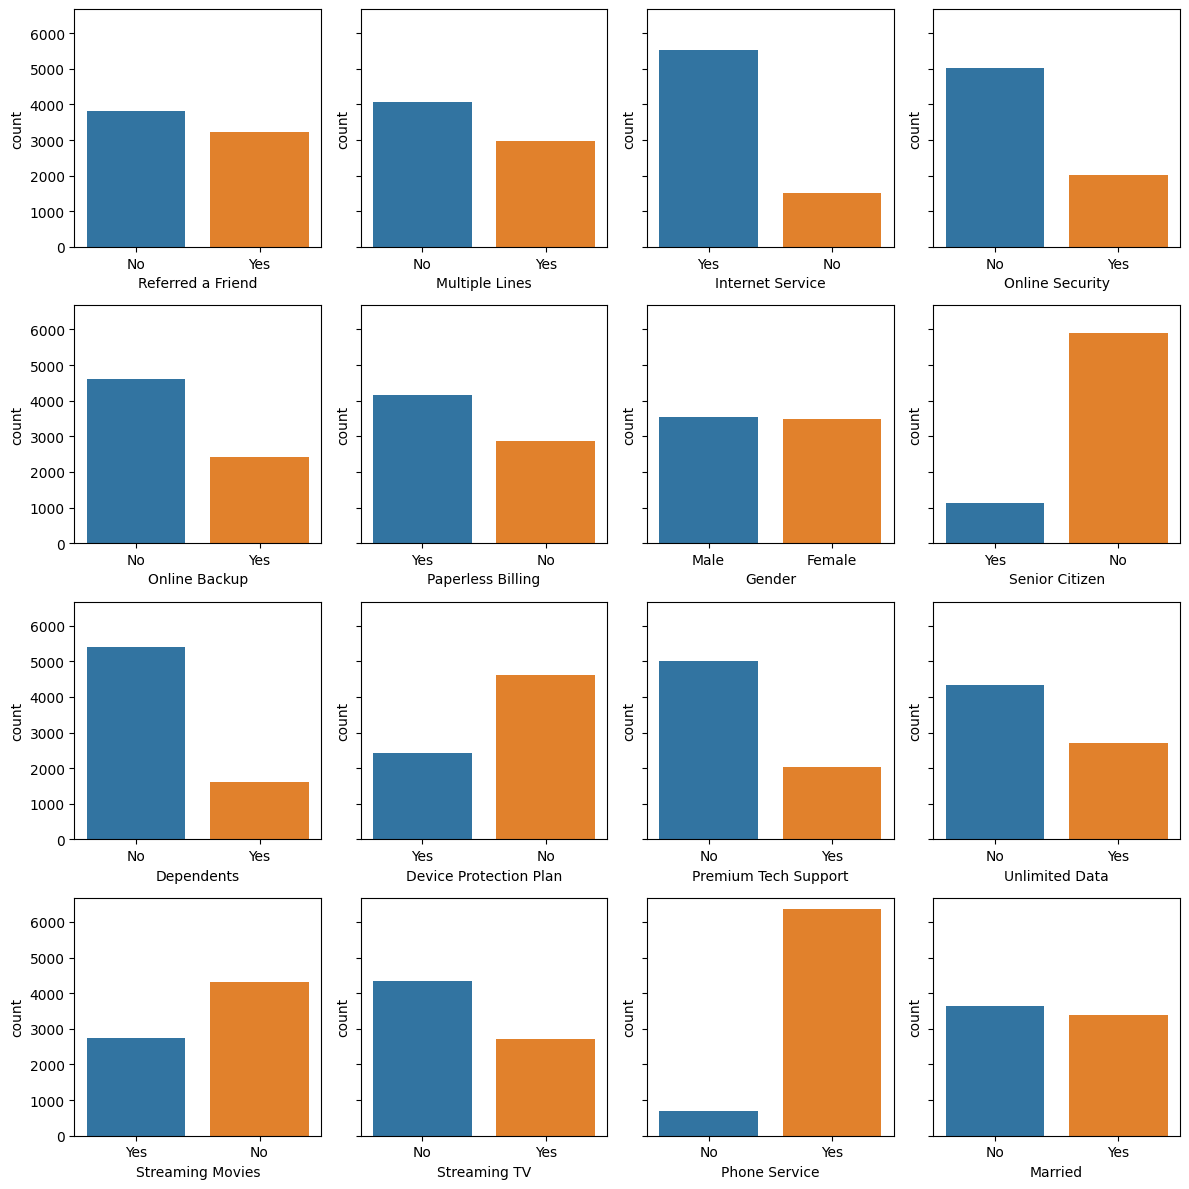

In [568]:
fig, axes = plt.subplots(4, 4, figsize=(12, 12), sharey=True)

sns.countplot(x="Referred a Friend", data=df, ax=axes[0,0])
sns.countplot(x="Multiple Lines", data=df, ax=axes[0,1])
sns.countplot(x="Internet Service", data=df, ax=axes[0,2])
sns.countplot(x="Online Security", data=df, ax=axes[0,3])
sns.countplot(x="Online Backup", data=df, ax=axes[1,0])
sns.countplot(x="Paperless Billing", data=df, ax=axes[1,1])
sns.countplot(x="Gender", data=df, ax=axes[1,2])
sns.countplot(x="Senior Citizen", data=df, ax=axes[1,3])
sns.countplot(x="Dependents", data=df, ax=axes[2,0])
sns.countplot(x="Device Protection Plan", data=df, ax=axes[2,1])
sns.countplot(x="Premium Tech Support", data=df, ax=axes[2,2])
sns.countplot(x="Unlimited Data", data=df, ax=axes[2,3])
sns.countplot(x="Streaming Movies", data=df, ax=axes[3,0])
sns.countplot(x="Streaming TV", data=df, ax=axes[3,1])
sns.countplot(x="Phone Service", data=df, ax=axes[3,2])
sns.countplot(x="Married", data=df, ax=axes[3,3])
plt.tight_layout()
plt.show()


#### There is a high imbalance in phone service, online security,internet service,online back up,device protection plan,
#### premium tech support, SeniorCitizen variables. Most of the customers are not senior and internet service , 
#### online service and tech premium support are provided only for less than half of the total customers.

####  It is better to check how the target variable (churn) changes according to the binary features. 

In [460]:
df[['Online Security','Churn Status']].groupby(['Online Security']).mean()

,Churn Status
Online Security,
No,0.313296
Yes,0.146112


#### Customers with online security are less likely to churn than without online security.

In [461]:
table = pd.pivot_table(df, values='Churn Status', index=['Online Security'],
                    columns=['Online Backup'], aggfunc=np.mean)
table

Online Backup,No,Yes
Online Security,,
No,0.314432,0.310054
Yes,0.197088,0.105684


#### This indicates that the combination of having both online security and online backup
#### is associated with the lowest churn rate.

In [462]:
df[['Internet Service','Churn Status']].groupby('Internet Service').mean()

,Churn Status
Internet Service,
No,0.074050
Yes,0.318289


#### Not having internet service lessens churn rate. so those having internet have more issues.

In [463]:
df[['Device Protection Plan','Churn Status']].groupby('Device Protection Plan').mean()

,Churn Status
Device Protection Plan,
No,0.286518
Yes,0.225021


"""Customers without a Device Protection Plan have a higher churn rate (28.65%) compared to customers with
a Device Protection Plan (22.50%).
This suggests that there may be a correlation between having a Device Protection Plan and a lower likelihood of churning."""

In [ ]:
df[['Premium Tech Support','Churn Status']].groupby('Premium Tech Support').mean()

"""Customers without Premium Tech Support have a higher churn rate (31.19%) compared to customers with
Premium Tech Support (15.17%).
This suggests that there may be a correlation between having Premium Tech Support and a lower likelihood of churning."""

In [465]:
df[['Referred a Friend','Churn Status']].groupby(['Referred a Friend']).mean()

,Churn Status
Referred a Friend,
No,0.325831
Yes,0.193669


### This gives an insight that they will continue the service.

In [466]:
df[['Multiple Lines','Churn Status']].groupby(['Multiple Lines']).mean()

,Churn Status
Multiple Lines,
No,0.250246
Yes,0.286099


"""Customers with multiple lines have a slightly higher churn rate (28.61%) compared to customers
without multiple lines (25.02%).
This suggests that having multiple lines may not be a strong factor influencing a lower likelihood of churning"""

In [467]:
df[['Paperless Billing','Churn Status']].groupby(['Paperless Billing']).mean()

,Churn Status
Paperless Billing,
No,0.163301
Yes,0.335651


"""Customers using paperless billing have a higher churn rate (33.57%) compared to customers not using
paperless billing (16.33%).
This suggests that there may be a correlation between not using paperless billing and a lower likelihood of churning."""

In [468]:
df[['Unlimited Data','Churn Status']].groupby(['Unlimited Data']).mean()

,Churn Status
Unlimited Data,
No,0.315741
Yes,0.184541


"""Customers without unlimited data have a higher churn rate (31.57%) compared to customers with unlimited data (18.45%).
This suggests that there may be a correlation between having unlimited data and a lower likelihood of churning."""

In [469]:
df[['Streaming TV','Churn Status']].groupby(['Streaming TV']).mean()

,Churn Status
Streaming TV,
No,0.243312
Yes,0.300702


"""Customers using streaming TV services have a higher churn rate (30.07%) compared to customers not using
streaming TV services (24.33%).
This suggests that there may be a correlation between using streaming TV services and a higher likelihood of churning."""

In [470]:
table = pd.pivot_table(df, values='Churn Status', index=['Streaming TV'],
                    columns=['Streaming Movies'], aggfunc=np.mean)
table

Streaming Movies,No,Yes
Streaming TV,,
No,0.227991,0.311869
Yes,0.316819,0.294330


"""The combination of streaming TV and streaming movies seems to have a somewhat lower churn rate than when only
one of these services is used.
The company might explore why customers who use streaming movies without streaming TV have a higher churn rate, considering 
factors such as content availability,pricing, or user experience."""

In [471]:
df[['Phone Service','Churn Status']].groupby('Phone Service').mean()

,Churn Status
Phone Service,
No,0.249267
Yes,0.267096


"""The presence or absence of phone service alone does not appear to strongly correlate with a significantly higher 
or lower likelihood of churning."""

In [573]:
cross_tab = pd.crosstab(df['Churn Status'], [df['Gender'], df['Under 30'], df['Senior Citizen'], df['Married'], df['Dependents']])
(cross_tab)

Gender         Female                                           ... Male       \
Under 30           No                                  Yes      ...   No        
Senior Citizen     No                Yes                No      ...   No        
Married            No      Yes        No      Yes       No      ...  Yes        
Dependents         No Yes   No  Yes   No Yes   No Yes   No Yes  ...   No  Yes   
Churn Status                                                    ...             
0                 728  70  423  465  159   2  139  28  193  28  ...  420  456   
1                 335  21  159   21  155   4   76   5  104   1  ...  167   20   

Gender                                               
Under 30                          Yes                
Senior Citizen  Yes                No                
Married          No      Yes       No      Yes       
Dependents       No Yes   No Yes   No Yes   No  Yes  
Churn Status                                         
0               126   4  18

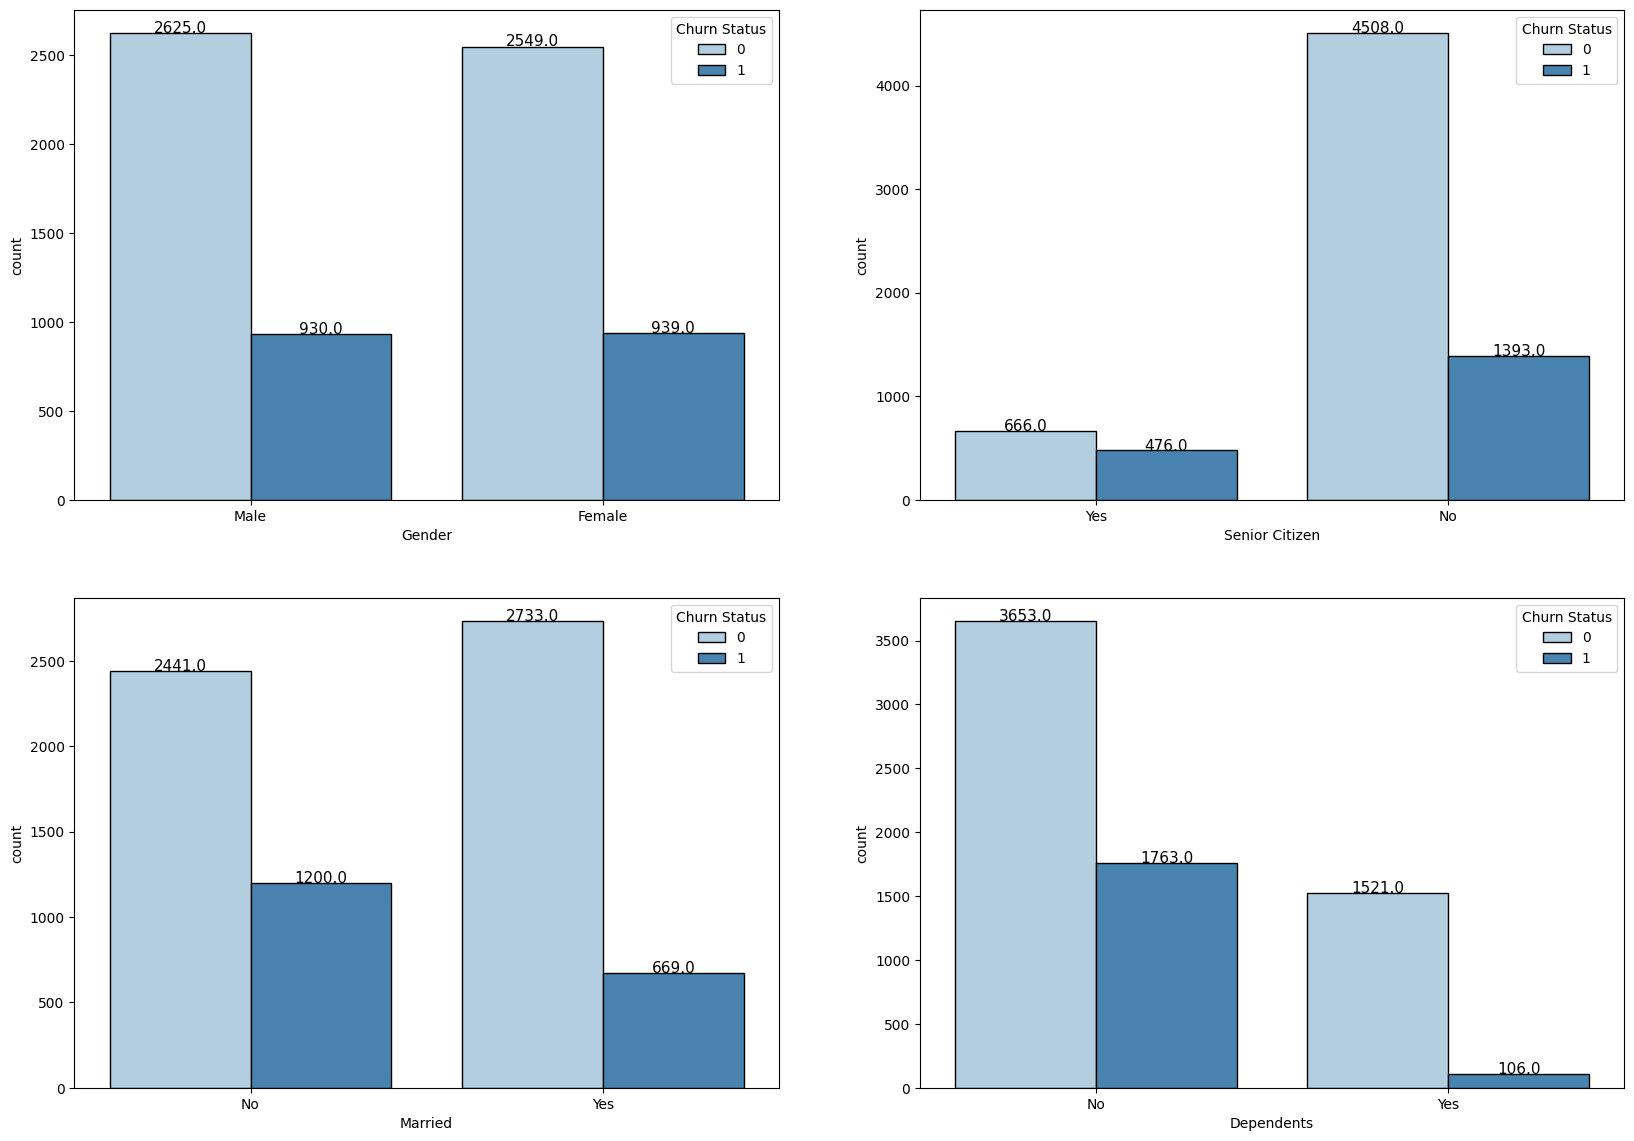

In [584]:

l1 = ['Gender', 'Senior Citizen', 'Married', 'Dependents'] # customer category

colors = "Blues"
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))

for i, variable in enumerate(l1):

    ax = sns.countplot(x=variable, data=df, hue="Churn Status", palette=colors, edgecolor='black', ax=axes[i // 2, i % 2])

    
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
                horizontalalignment='center', fontsize=11)

    
    title = variable + ' vs Churn'

"""** Customer churning for male & female customers is very similar to each other.This suggests that gender 
alone may not be a strong predictor of churn in the given context.
** Number of SeniorCitizen customers is pretty low. Out of that, we can observe a near about 40% churn 
of SeniorCitizen customers. It accounts for a total of 476 customers out of 1142 Senior Citizen customers.
This indicates that being a Senior Citizen might be a factor contributing to higher churn.
** Customers who are married churned less as compared to those not.This could imply that marital status
might be a mitigating factor, and married customers may be more likely to stay with the service.
** churning is high for the customers that don't have Dependents with them.This suggests that the presence
of dependents may influence customers to be more stable and less likely to churn."""

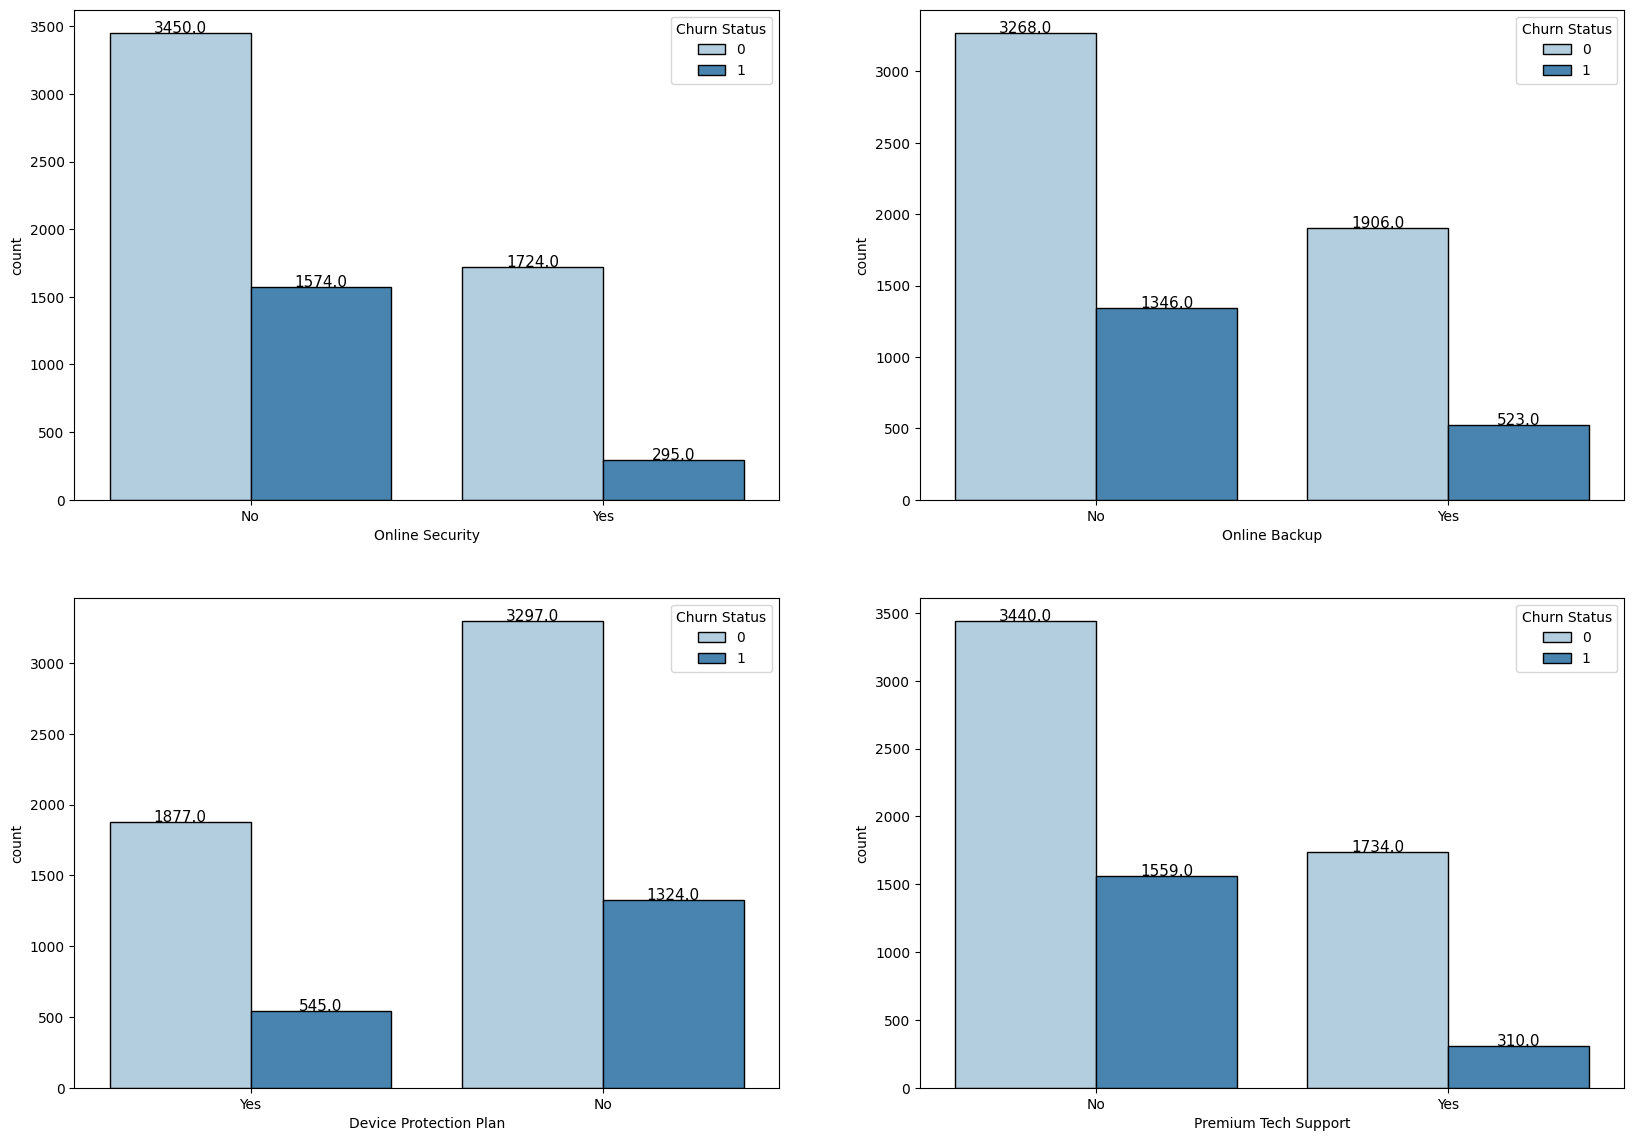

In [588]:
l2=['Online Security','Online Backup','Device Protection Plan','Premium Tech Support'] # customer tech services
colors = "Blues"
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))

for i, variable in enumerate(l2):

    ax = sns.countplot(x=variable, data=df, hue="Churn Status", palette=colors, edgecolor='black', ax=axes[i // 2, i % 2])

    
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
                horizontalalignment='center', fontsize=11)

    
    title = variable + ' vs Churn'

"""When it comes down to catering the customers, services w.r.t OnlineSecurity, OnlineBackup, DeviceProtection & TechSupport
are crucial from the above visualizations.
A high number of customers have switched their service provider when it comes down poor services with the above mentioned 
features. So these features are valuable for the model"""

## Other Categorical Variables

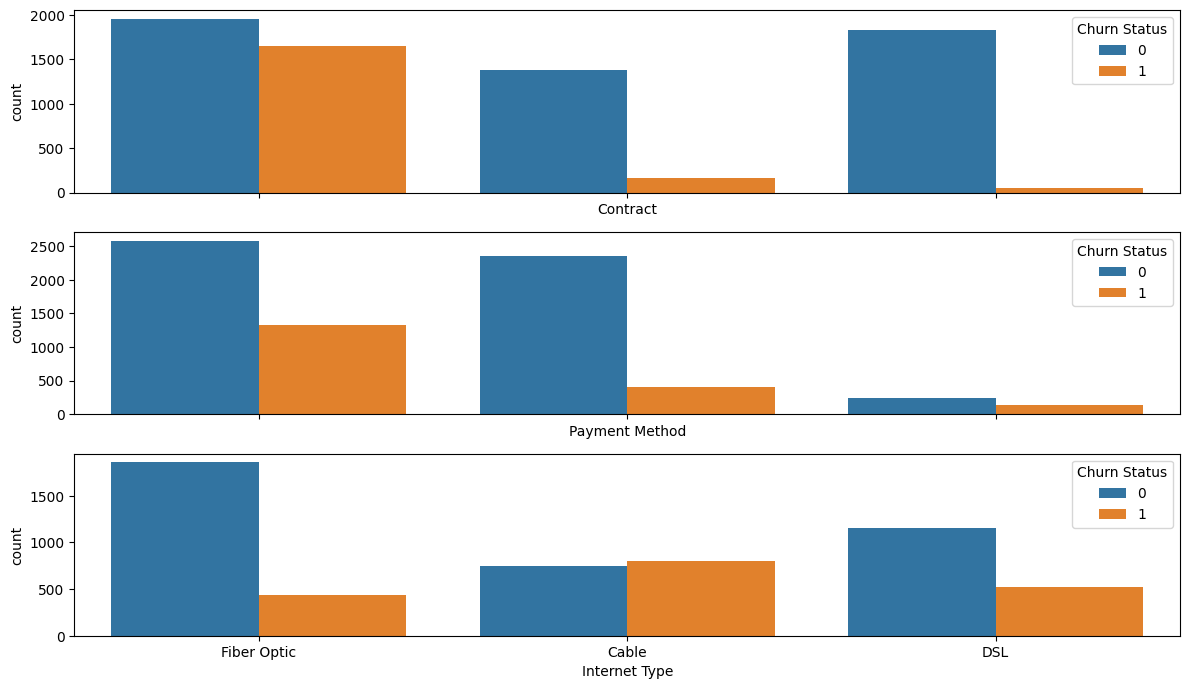

In [472]:
fig, axes = plt.subplots(3, 1, figsize=(12, 7), sharex=True)

sns.countplot(x="Contract", hue="Churn Status", data=df, ax=axes[0])
sns.countplot(x="Payment Method", hue="Churn Status", data=df, ax=axes[1])
sns.countplot(x="Internet Type", hue="Churn Status", data=df, ax=axes[2])

plt.tight_layout()
plt.show()

#### Each bar is divided into segments, representing the churn and non-churn categories within each category. 


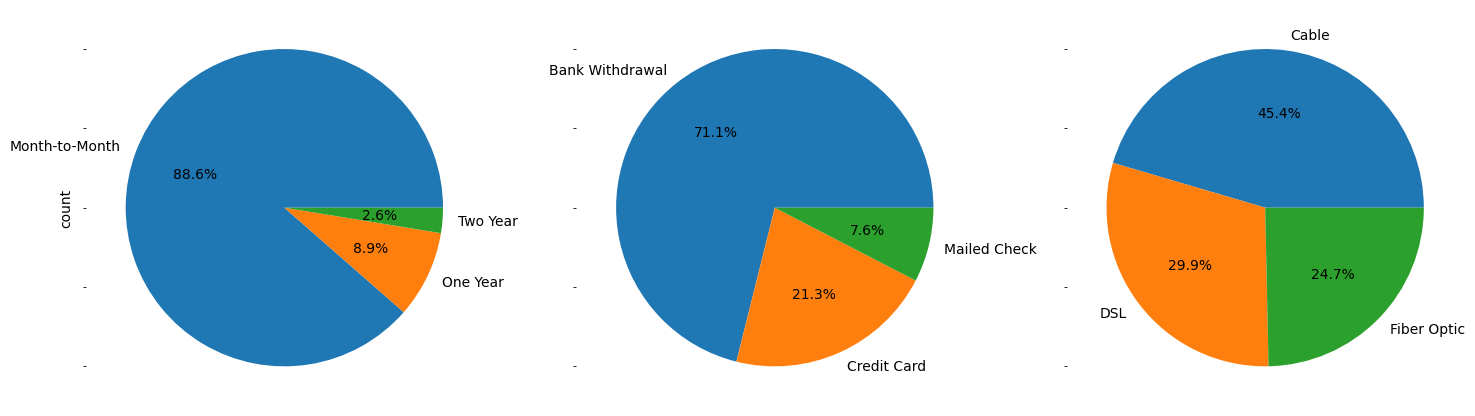

In [473]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

df[df['Churn Status'] == 1]['Contract'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0])
df[df['Churn Status'] == 1]['Payment Method'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1])
df[df['Churn Status'] == 1]['Internet Type'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[2])

plt.tight_layout()
plt.show()

"""High customer churn is observed for Month-to-Month contracts, possibly because customers are testing various
        services on a short-term basis to save money.Inconsistencies in the overall experience with internet, streaming,
        and phone services may contribute to churn, as customers have different priorities.PaperlessBilling is associated
        with a high churn rate, potentially due to payment or receipt issues. Electronic check payments are strongly 
        disliked, with 1071 out of 2365 customers exiting the service,indicating a need to reconsider or improve this
        payment method."""







In [474]:
df[['Internet Type','Churn Status']].groupby('Internet Type').mean()

,Churn Status
Internet Type,
Cable,0.516171
DSL,0.312500
Fiber Optic,0.189000


In [475]:
df[['Payment Method','Churn Status']].groupby('Payment Method').mean()

,Churn Status
Payment Method,
Bank Withdrawal,0.339985
Credit Card,0.144780
Mailed Check,0.368831


## Continuous Variables


#### Let's also have a look at the distribution of continuous features.

C:\Users\Aneesa Abbas.DESKTOP-7K8D8LI\AppData\Local\Temp\ipykernel_21120\3306522289.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Tenure in Months"], ax=axes[0, 0], kde=False, bins=20)
C:\Users\Aneesa Abbas.DESKTOP-7K8D8LI\AppData\Local\Temp\ipykernel_21120\3306522289.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29744

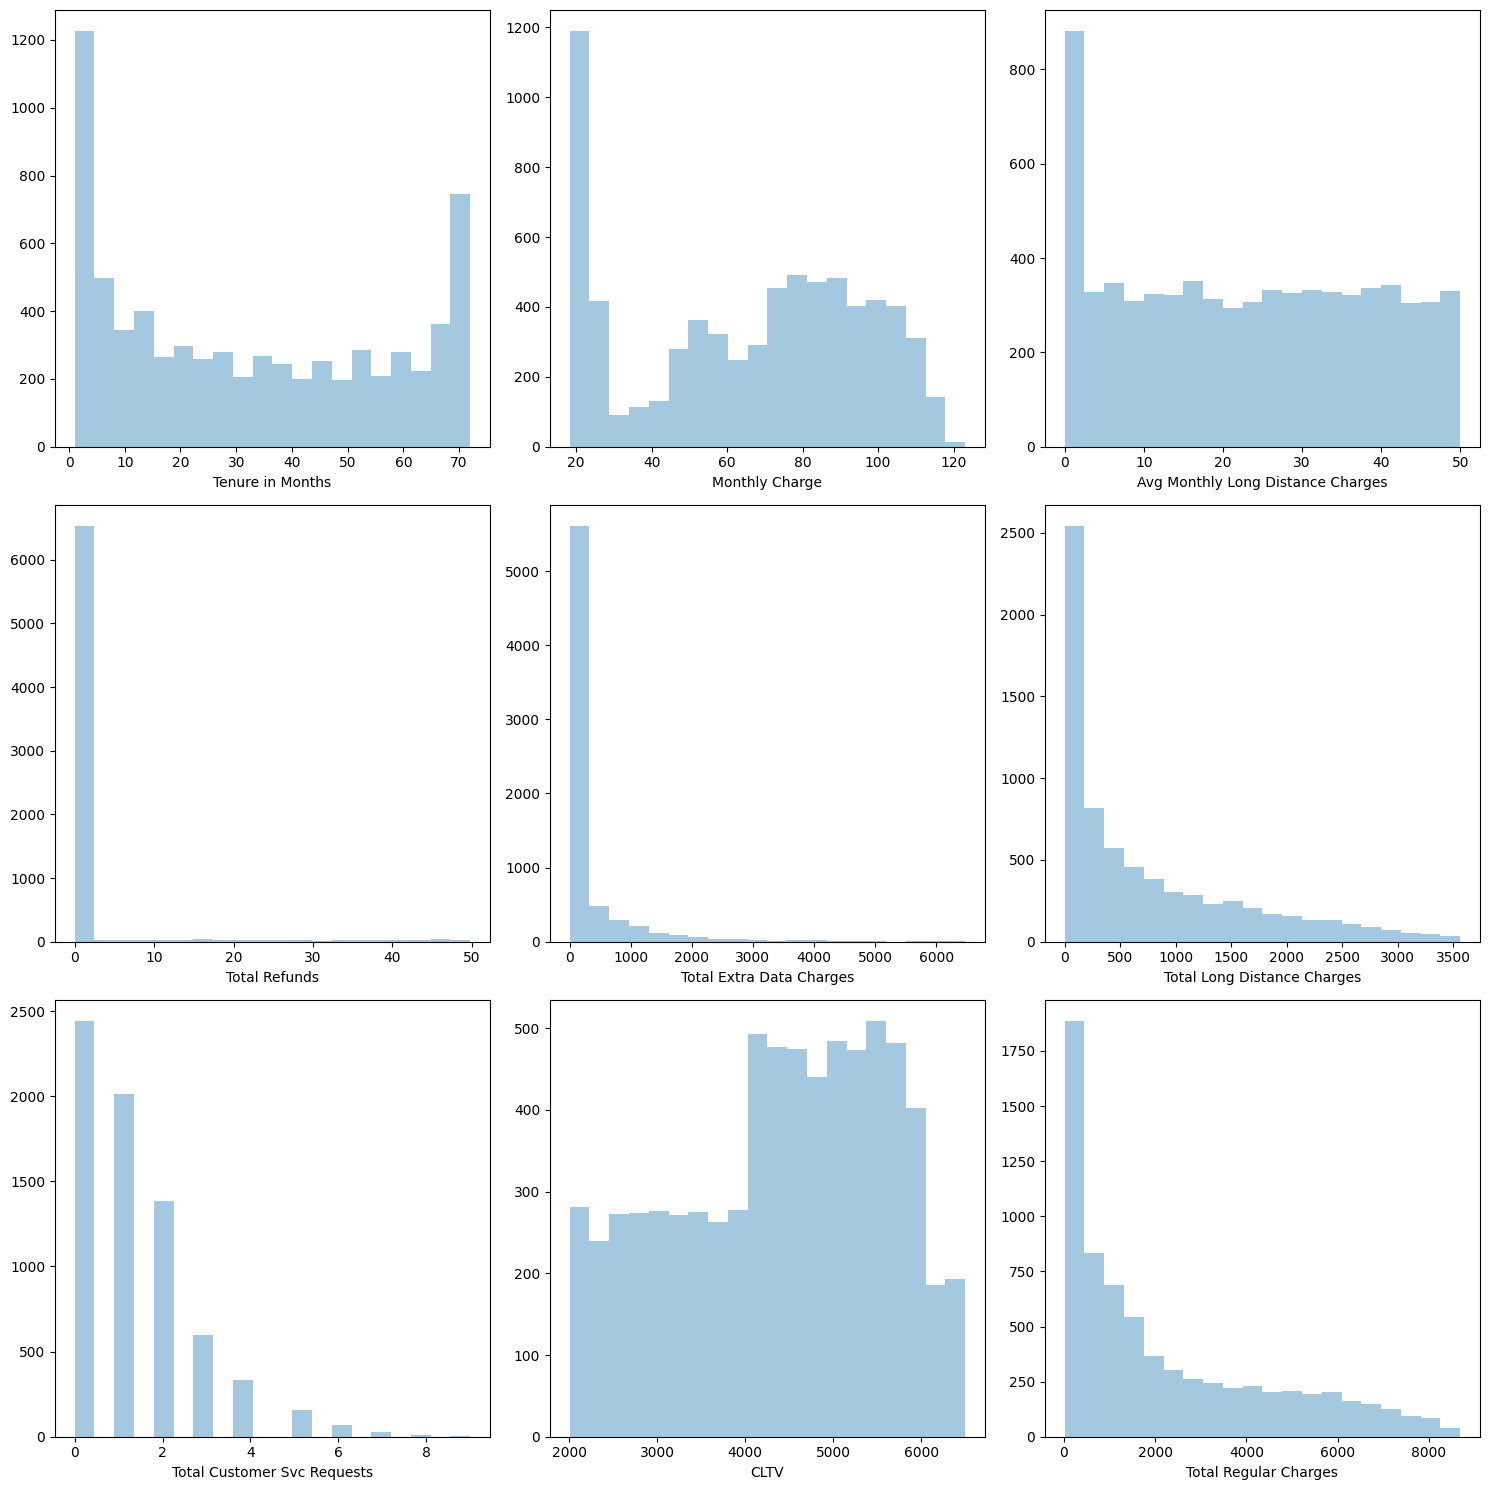

In [476]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

sns.distplot(df["Tenure in Months"], ax=axes[0, 0], kde=False, bins=20)
sns.distplot(df["Monthly Charge"], ax=axes[0, 1], kde=False, bins=20)
sns.distplot(df["Avg Monthly Long Distance Charges"], ax=axes[0, 2], kde=False, bins=20)
sns.distplot(df["Total Refunds"], ax=axes[1, 0], kde=False, bins=20)
sns.distplot(df["Total Extra Data Charges"], ax=axes[1, 1], kde=False, bins=20)
sns.distplot(df["Total Long Distance Charges"], ax=axes[1, 2], kde=False, bins=20)
sns.distplot(df["Total Customer Svc Requests"], ax=axes[2, 0], kde=False, bins=20)
sns.distplot(df["CLTV"], ax=axes[2, 1], kde=False, bins=20)
sns.distplot(df["Total Regular Charges"], ax=axes[2, 2], kde=False, bins=20)

plt.tight_layout()
plt.show()

In [477]:
df[['Tenure in Months','Monthly Charge','Churn Status']].groupby('Churn Status').mean()


,Tenure in Months,Monthly Charge
Churn Status,,
0,37.591225,61.265124
1,17.979133,77.369727


 """The customers that churned had a low mean tenure of 17.98 months as compared to those
    who continued with an average tenure period of 37.57 months.Mean MonthlyCharges of the churn customers,
    77.4, is more than that of not-churn customers, 61.27.Shorter tenure and higher monthly charges seem to be associated
    with a higher likelihood of churn."""

In [478]:
df[['Product/Service Issues Reported','Churn Status']].groupby('Churn Status').mean()


,Product/Service Issues Reported
Churn Status,
0,0.135872
1,0.784912


 """ There is a significant difference in the rate of reported product/service issues between customers who did not
 churn (Churn Status = 0) and those who churned (Churn Status = 1).
 Customers experiencing problems are more inclined to discontinue their services.
 Enhancing the overall customer experience and promptly resolving reported issues may positively
 impact customer retention."""

In [479]:
df[['Avg Monthly Long Distance Charges','Total Long Distance Charges','Churn Status']].groupby('Churn Status').mean()

,Avg Monthly Long Distance Charges,Total Long Distance Charges
Churn Status,,
0,22.883572,862.952107
1,23.167635,433.917549


In [480]:
df[['Total Customer Svc Requests','CLTV','Number of Referrals','Churn Status']].groupby('Churn Status').mean()


,Total Customer Svc Requests,CLTV,Number of Referrals
Churn Status,,,
0,0.877464,4490.921337,2.468690
1,2.615837,4149.414660,0.521134


#### The positive correlation between the number of service requests and churn status implies that customers with
#### a higher number of service requests are more likely to churn. 
#### This could be indicative of dissatisfaction or unresolved issues leading to the decision to discontinue services.

#### The lower CLTV for churning customers suggests that those who have more service requests and
#### ultimately churn may have a lower long-term value for the company.

C:\Users\Aneesa Abbas.DESKTOP-7K8D8LI\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


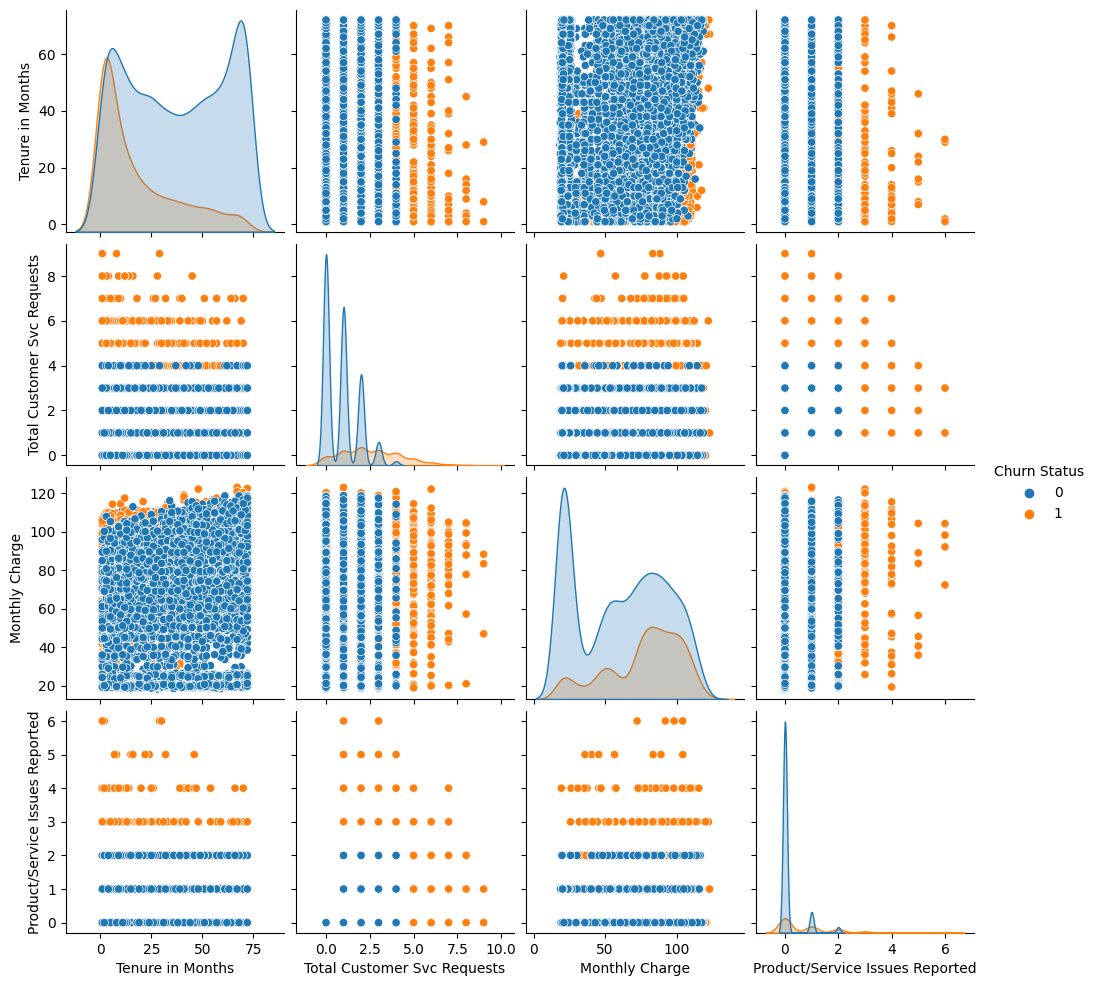

In [481]:
numerical_features = ['Tenure in Months', 'Total Customer Svc Requests', 'Monthly Charge','Product/Service Issues Reported','Churn Status']

# Selecting a subset of the dataframe with only numerical features
numerical_df = df[numerical_features]

# Creating a pair plot
sns.pairplot(numerical_df, hue='Churn Status')
plt.show()

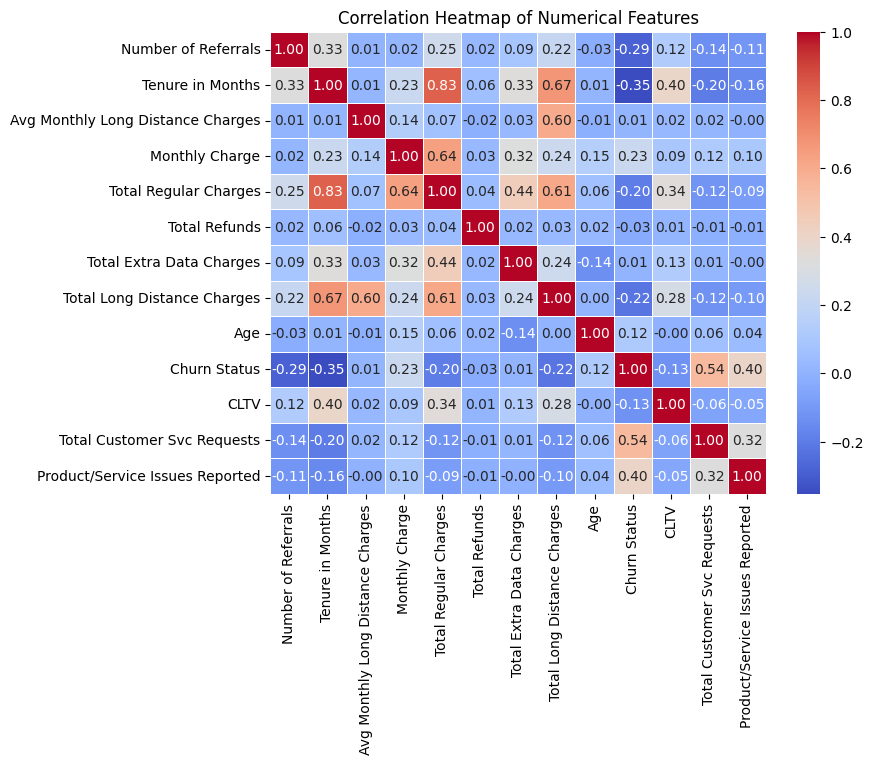

In [482]:
numerical_features1=['Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges','Monthly Charge', 'Total Regular Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges', 'Age',
       'Churn Status', 'CLTV', 'Total Customer Svc Requests',
       'Product/Service Issues Reported',] 
# Selecting a subset of the dataframe with only numerical features
numerical_df1 = df[numerical_features1]
    # Calculate the correlation matrix
correlation_matrix = numerical_df1.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

#### Tenure in months and Total Customer Svc Requests,product service issues report are more valuable features
#### than Monthly Charge according to the maps.

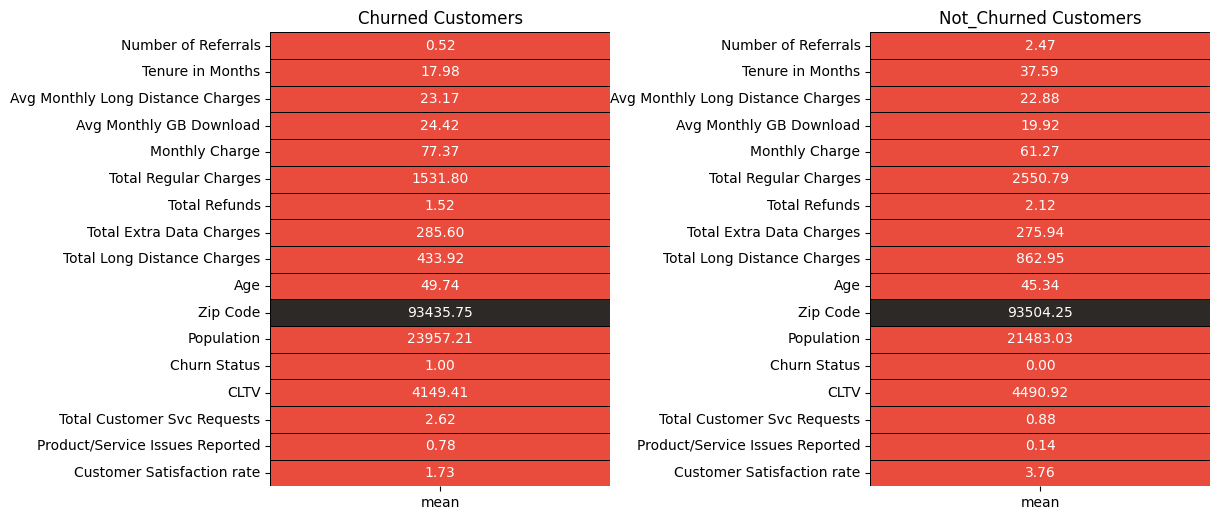

In [577]:
colors = ['#E94B3C','#2D2926']

churn = df[df['Churn Status'] == 1].describe().T
not_churn = df[df['Churn Status'] == 0].describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Churned Customers');

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Not_Churned Customers');

fig.tight_layout(pad = 0)


In [483]:
df[['Contract','Tenure in Months']].groupby('Contract').mean()

,Tenure in Months
Contract,
Month-to-Month,17.350416
One Year,41.252903
Two Year,53.915560


### contract and tenure are highly correlated. Customers with long contracts have been a customer for longer time 
### than customers with short-term contracts. So no need to use both  features in model.Can drop contract feature.


#### After exploring the variables,removing the variables that addlittle or no informative power to the model:
####   Customer ID', 'Offer', 'Phone Service','Avg Monthly Long Distance Charges',
#### 'Multiple Lines', 'Avg Monthly GB Download',,'Device Protection Plan',, 'Streaming TV',
#### 'Streaming Movies','Streaming Music', 'Contract','Payment Method', 'Total Regular Charges','Total Refunds', 
#### 'Total Extra Data Charges','Total Long Distance Charges', 'Gender', 'Age', 'Under 30','Senior Citizen',
#### 'Married', 'Dependents', 'City', 'Zip Code','Population', 'CLTV', 'Churn Category', 'Churn Reason',
#### 'Customer Satisfaction rate'. 

       


In [484]:
df.drop(['Customer ID', 'Referred a Friend', 'Offer', 'Phone Service','Avg Monthly Long Distance Charges',
'Multiple Lines', 'Avg Monthly GB Download','Device Protection Plan', 'Streaming TV',
'Streaming Movies','Streaming Music', 'Contract','Payment Method', 'Total Regular Charges','Total Refunds',
'Total Extra Data Charges','Total Long Distance Charges', 'Gender', 'Age', 'Under 30','Senior Citizen',
'Married', 'Dependents', 'City', 'Zip Code','Population', 'CLTV', 'Churn Category', 'Churn Reason',
'Customer Satisfaction rate'], axis=1, inplace=True)
df.head()

,Number of Referrals,Tenure in Months,Internet Service,Internet Type,Online Security,Online Backup,Premium Tech Support,Unlimited Data,Paperless Billing,Monthly Charge,Churn Status,Total Customer Svc Requests,Product/Service Issues Reported
0,0,1,Yes,Fiber Optic,No,No,No,No,Yes,41.236,1,5,0
1,1,8,Yes,Cable,No,Yes,No,No,Yes,83.876,1,5,0
2,0,18,Yes,Fiber Optic,No,No,No,Yes,Yes,99.268,1,1,0
3,1,25,Yes,Fiber Optic,No,Yes,No,No,Yes,102.440,1,1,1
4,1,37,Yes,Cable,No,No,No,No,Yes,79.560,1,1,0


###### In order to incorporate categorical features into machine learning models, it's essential to convert 
###### them into numerical representations. Our dataset contains non-ordinal categorical variables, 
###### meaning there's no inherent order among them. For instance, "DSL" internet service isn't
###### inherently superior to "Fiber optic" internet service. In contrast, ordinal categorical
###### variables might involve ratings from 1 to 5 or categories like "bad," "average," and "good."

###### During the encoding process, each category is assigned a numerical value. However, it's 
###### crucial to note that higher numerical assignments don't imply superiority; they're merely
###### for representation. The goal is to create columns for each category, and the values within
###### these columns are binary, either 0 or 1.

###### Additionally, continuous variables need to be scaled. Without scaling, variables with larger 
###### values might inadvertently be given more significance, potentially affecting the model's accuracy.
###### Scaling ensures that each variable contributes proportionally to the model's calculations,
###### irrespective of its original numerical range.

In [485]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [486]:
cat_features = ['Internet Service','Online Security','Online Backup',
 'Premium Tech Support','Unlimited Data','Paperless Billing','Internet Type',]
X = pd.get_dummies(df, columns=cat_features, drop_first=True)


In [487]:
X

,Number of Referrals,Tenure in Months,Monthly Charge,Churn Status,Total Customer Svc Requests,Product/Service Issues Reported,Internet Service_Yes,Online Security_Yes,Online Backup_Yes,Premium Tech Support_Yes,Unlimited Data_Yes,Paperless Billing_Yes,Internet Type_DSL,Internet Type_Fiber Optic
0,0,1,41.236,1,5,0,True,False,False,False,False,True,False,True
1,1,8,83.876,1,5,0,True,False,True,False,False,True,False,False
2,0,18,99.268,1,1,0,True,False,False,False,True,True,False,True
3,1,25,102.440,1,1,1,True,False,True,False,False,True,False,True
4,1,37,79.560,1,1,0,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,72,21.150,0,0,0,False,False,False,False,False,True,False,False
7039,1,24,84.800,0,2,0,True,True,False,True,True,True,True,False
7040,4,72,103.200,0,2,0,True,False,True,False,False,True,False,False
7041,1,11,29.600,0,0,0,True,True,False,False,True,True,True,False


In [488]:
numerical_features2 = ['Tenure in Months', 'Monthly Charge','Number of Referrals','Total Customer Svc Requests','Product/Service Issues Reported']
sc = MinMaxScaler()
scaled_data = sc.fit_transform(df[numerical_features2])

In [489]:
scaled_data

array([[0.        , 0.21926093, 0.        , 0.55555556, 0.        ],
       [0.09859155, 0.6259992 , 0.09090909, 0.55555556, 0.        ],
       [0.23943662, 0.77282179, 0.        , 0.11111111, 0.        ],
       ...,
       [1.        , 0.81032871, 0.36363636, 0.22222222, 0.        ],
       [0.14084507, 0.1082664 , 0.09090909, 0.        , 0.        ],
       [0.91549296, 0.83369899, 0.        , 0.11111111, 0.33333333]])

In [490]:
X[numerical_features2]=scaled_data # assigning  scaled values back to the corresponding columns in DataFrame X
                                   # ensures that numerical features are on a similar scale, which can be
                                   #    beneficial for certain machine learning algorithms.

In [491]:
X.shape

(7043, 14)

In [ ]:
# Resampling
#### As we briefly discussed in the beginning, target variables with imbalanced class distribution is not desired 
#### for machine learning models. I will use upsampling which means increasing the number of samples of the class with 
#### less samples by randomly selecting rows from it.

Text(0.5, 1.0, 'Class Distribution Before Resampling')

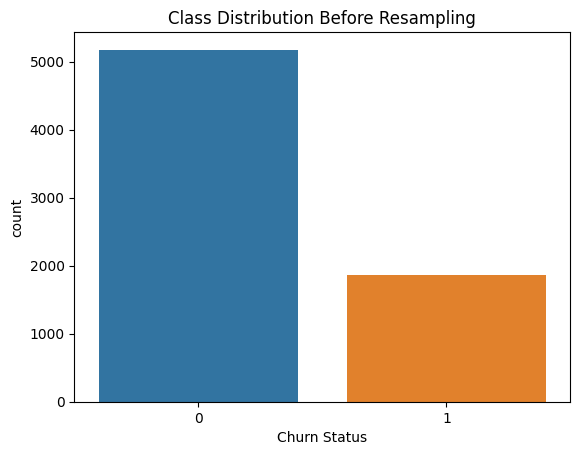

In [492]:
sns.countplot(x='Churn Status', data=df).set_title('Class Distribution Before Resampling')

In [493]:
X_no = X[X['Churn Status'] == 0]
X_yes = X[X['Churn Status'] == 1]

In [494]:
print(len(X_no),len(X_yes))

5174 1869


In [495]:
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
print(len(X_yes_upsampled))

5174


In [496]:

X_upsampled = pd.concat([X_no, X_yes_upsampled]).reset_index(drop=True)

Text(0.5, 1.0, 'Class Distribution After Resampling')

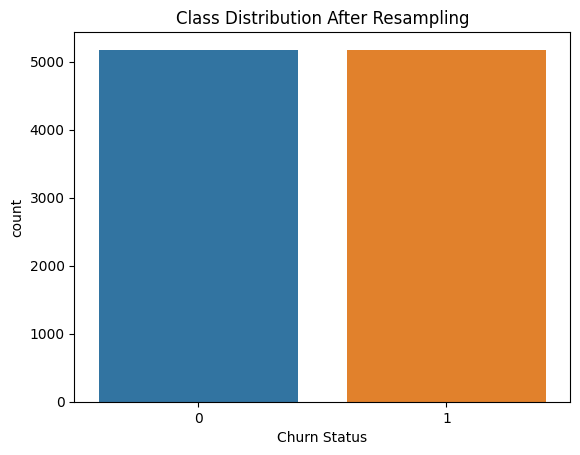

In [497]:
sns.countplot(x='Churn Status', data=X_upsampled).set_title('Class Distribution After Resampling')

# MODEL SELECTION AND EVALUATION
#### Different algorithms may perform differently on the same dataset. 
#### By trying multiple algorithms, you can identify which one works best for your specific problem.
#### We need to divide the data set into training and test subsets so that we are able to
#### measure the performance of our model on new, previously unseen examples.

In [498]:
from sklearn.model_selection import train_test_split

In [499]:
X = X_upsampled.drop(['Churn Status'], axis=1) #features (independent variables)
y = X_upsampled['Churn Status'] #target (dependent variable)

In [500]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [501]:
from sklearn.preprocessing import StandardScaler     # feature Scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [502]:
from sklearn.linear_model import LogisticRegression # train the logistic regression model

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [503]:
y_pred = model.predict(X_test)  # make predictions


In [504]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)                                     # evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.8584541062801933
Confusion Matrix:
[[906 138]
 [155 871]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1044
           1       0.86      0.85      0.86      1026

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



""" Let's break down each part:

Accuracy: It is the ratio of correctly predicted instances to the total instances. 
In this case, the accuracy is approximately 85.85%, indicating that the model correctly predicted the target
variable for about 85.85% of the instances.

Confusion Matrix:

True Positive (TP): 871 instances were correctly predicted as positive (Churn).
False Positive (FP): 138 instances were incorrectly predicted as positive.
True Negative (TN): 906 instances were correctly predicted as negative (No Churn).
False Negative (FN): 155 instances were incorrectly predicted as negative.
Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives.
Precision is about 86%, indicating that when the model predicts a positive outcome, it is correct about 86% of the time.

Recall (Sensitivity or True Positive Rate): Recall is the ratio of correctly predicted positive observations to the
all observations in the actual class. In this case, recall is about 85%, indicating that the model correctly identified 
about 85% of the actual positive instances.

F1-Score: It is the weighted average of Precision and Recall. It ranges from 0 to 1, where 1 is the best possible F1-Score.
In this case, the F1-Score is about 0.86.

Support: The number of actual occurrences of the class in the specified dataset. For class 0 (No Churn), the support is
1044, and for class 1 (Churn), the support is 1026.

Macro Avg and Weighted Avg: These are the averages for precision, recall, and F1-score. Macro Avg gives equal weight
to each class, while Weighted Avg considers the number of occurrences of each class.

In summary, this model seems to perform reasonably well, with good accuracy, precision, recall, and F1-score for both
classes. It's always a good idea to consider the specific requirements of your application when interpreting these metrics.
For example, in a churn prediction scenario,you might want to prioritize either precision or recall based on 
business needs."""







# Decision Tree

In [505]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.936231884057971
Confusion Matrix:
 [[ 934  110]
 [  22 1004]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93      1044
           1       0.90      0.98      0.94      1026

    accuracy                           0.94      2070
   macro avg       0.94      0.94      0.94      2070
weighted avg       0.94      0.94      0.94      2070



"""Here's an interpretation of the results:

Accuracy (Overall Correct Predictions): 93.62% of the predictions are correct, which indicates how well the model is
performing overall.

Confusion Matrix:

True Positives (TP): 1004 - The number of instances where the model correctly predicted that the customers will churn.
True Negatives (TN): 934 - The number of instances where the model correctly predicted that the customers will not churn.
False Positives (FP): 110 - The number of instances where the model incorrectly predicted that the customers will churn
(Type I error).
False Negatives (FN): 22 - The number of instances where the model incorrectly predicted that the customers will not churn 
(Type II error).
Classification Report:

Precision: The ability of the classifier not to label as positive a sample that is negative. High precision relates to 
a low false positive rate. Precision = TP / (TP + FP)
Recall (Sensitivity or True Positive Rate): The ability of the classifier to find all the positive samples. Recall = TP
/ (TP + FN)
F1-Score: The weighted average of precision and recall. It ranges from 0 to 1, where 1 is the best possible F1-Score.
In summary, the model has a high accuracy and performs well in terms of precision, recall, and F1-Score. The confusion 
matrix and classification report provide insights into how well the model is distinguishing between churn and non-churn
instances."""







# Random Forest 
##### An ensemble of decision trees, which often provides better performance than a single decision tree.

In [506]:
from sklearn.ensemble import RandomForestClassifier


# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.9584541062801932
Confusion Matrix:
[[ 978   66]
 [  20 1006]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1044
           1       0.94      0.98      0.96      1026

    accuracy                           0.96      2070
   macro avg       0.96      0.96      0.96      2070
weighted avg       0.96      0.96      0.96      2070



"""Let's interpret the results:

Accuracy (Overall Correct Predictions): 95.8%

This indicates that the model correctly predicted the Churn Status for approximately 95.8% of the samples.

Confusion Matrix:

True Positive (TP): 1006 - The number of instances correctly predicted as Churn (Churn=1).
True Negative (TN): 978 - The number of instances correctly predicted as Not Churn (Churn=0).
False Positive (FP): 66 - The number of instances incorrectly predicted as Churn.
False Negative (FN): 20 - The number of instances incorrectly predicted as Not Churn.
Precision:

Precision for Churn (1): 94% - Of all instances predicted as Churn, 94% were actually Churn.
Precision for Not Churn (0): 98% - Of all instances predicted as Not Churn, 98% were actually Not Churn.
Recall (Sensitivity or True Positive Rate):

Recall for Churn (1): 98% - Out of all actual Churn instances, the model correctly identified 98%.
Recall for Not Churn (0): 94% - Out of all actual Not Churn instances, the model correctly identified 94%.
F1-Score:

The F1-Score is the harmonic mean of precision and recall. It balances both metrics.
F1-Score for Churn (1): 96%
F1-Score for Not Churn (0): 96%
Support:

The number of actual occurrences of each class in the specified order (0 and 1).
In summary, the model has high accuracy and performs well in identifying both Churn and Not Churn instances. 
It's a good balance between precision and recall, as indicated by the high F1-Score. The Confusion Matrix 
provides a detailed breakdown of correct and incorrect predictions for each class."""







In [507]:
from sklearn.metrics import accuracy_score # to check if there is  overfitting
# Assuming X and y are the features and target variable
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
# Example
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f'Training Accuracy: {train_accuracy}')
print(f'Validation Accuracy: {val_accuracy}')

Training Accuracy: 0.7846196327488609
Validation Accuracy: 0.7783505154639175


C:\Users\Aneesa Abbas.DESKTOP-7K8D8LI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Aneesa Abbas.DESKTOP-7K8D8LI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


"""Training Accuracy (0.7846): This is the accuracy of your model on the data it was trained on. In this case, about 78.46% 
of the examples in your training set were classified correctly by the model.

Validation Accuracy (0.7784): This is the accuracy of your model on a separate dataset that it hasn't seen during training.
In this case, about 77.84% of the examples in your validation set were classified correctly by the model.

Comparing these two accuracies can give you insights into how well your model is generalizing to new, unseen data. If the 
training accuracy is significantly higher than the validation accuracy, it might indicate overfitting, where the model
is memorizing the training data instead of learning the underlying patterns.
If both accuracies are low, the model might not be capturing the patterns in the data well."""

In [508]:
# XG Boost

In [509]:
import xgboost as xgb

# Initialize the XGBoost classifier
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.9504185447520928
Confusion Matrix:
[[732  55]
 [ 22 744]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       787
           1       0.93      0.97      0.95       766

    accuracy                           0.95      1553
   macro avg       0.95      0.95      0.95      1553
weighted avg       0.95      0.95      0.95      1553



"""

Accuracy: 0.9504: This indicates that the model correctly predicted the churn status for approximately 95.04%
of the samples in the test set.

Confusion Matrix:

True Positive (TP): 744
True Negative (TN): 732
False Positive (FP): 55
False Negative (FN): 22
Precision, Recall, and F1-Score:

Precision (Positive Predictive Value): Precision is the ratio of correctly predicted positive observations
to the total predicted positives. In your case, for class 1, it's 0.93. This means that when the model 
predicts a customer will churn, it is correct 93% of the time.
Recall (Sensitivity or True Positive Rate): Recall is the ratio of correctly predicted positive observations
to the all observations in the actual class. For class 1, it's 0.97. This indicates that the model is capturing 
97% of the customers who actually churned.
F1-Score: The F1-Score is the weighted average of Precision and Recall. It's a good metric that considers both 
false positives and false negatives. A high F1-Score indicates good overall performance.
Support: Indicates the number of actual occurrences of the class in the specified dataset.

Overall, the model seems to perform well with high accuracy, precision, recall, and F1-Score. However,
the interpretation should also consider the specific business context and requirements."""







In [510]:
# Support Vector Machines (SVM)

In [511]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)

print(f"Accuracy (SVM): {accuracy_svm}")
print(f"Confusion Matrix (SVM):\n{conf_matrix_svm}")
print(f"Classification Report (SVM):\n{classification_report_svm}")


Accuracy (SVM): 0.8594202898550725
Confusion Matrix (SVM):
[[917 127]
 [164 862]]
Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1044
           1       0.87      0.84      0.86      1026

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



# K Nearest Neighbours (KNN)

In [512]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)

print(f"Accuracy (KNN): {accuracy_knn}")
print(f"Confusion Matrix (KNN):\n{conf_matrix_knn}")
print(f"Classification Report (KNN):\n{classification_report_knn}")


Accuracy (KNN): 0.8714975845410629
Confusion Matrix (KNN):
[[873 171]
 [ 95 931]]
Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1044
           1       0.84      0.91      0.88      1026

    accuracy                           0.87      2070
   macro avg       0.87      0.87      0.87      2070
weighted avg       0.87      0.87      0.87      2070



# BEST MODEL

In [513]:
from sklearn.ensemble import RandomForestClassifier


# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)


In [514]:
import joblib
joblib.dump(RandomForestClassifier, 'RandomForestClassifier.pkl')

['RandomForestClassifier.pkl']

# FEATURE IMPORTANCE ANALYSIS

#### To understand which features have the most significant impact on predicting attrition.
#### This insight guides our understanding of the driving factors behind customer departures.

In [625]:
# Load the trained Gradient Boosting model
import joblib

loaded_model = joblib.load('RandomForestClassifier.pkl')

# Create a series with feature importance 

rf_model.feature_importances_

array([0.12546585, 0.18430116, 0.21062753, 0.19844673, 0.08248343,
       0.03283273, 0.02267093, 0.01829619, 0.02607986, 0.03598183,
       0.0230778 , 0.01507734, 0.02465862])

In [626]:
rf_imp=list(rf_model.feature_importances_)

In [627]:
rf_colname=list(X.columns)

In [628]:
rf_dict={'Column_Names_rf':rf_colname,'feature_imp_rf':rf_imp}

In [629]:
rf_feature_imp=pd.DataFrame(rf_dict)

In [630]:
rf_feature_rank=rf_feature_imp.sort_values(by='feature_imp_rf',ascending = False)

In [631]:
rf_feature_rank

,Column_Names_rf,feature_imp_rf
2,Monthly Charge,0.210628
3,Total Customer Svc Requests,0.198447
1,Tenure in Months,0.184301
0,Number of Referrals,0.125466
4,Product/Service Issues Reported,0.082483
9,Unlimited Data_Yes,0.035982
5,Internet Service_Yes,0.032833
8,Premium Tech Support_Yes,0.026080
12,Internet Type_Fiber Optic,0.024659
10,Paperless Billing_Yes,0.023078


#### The model emphasizes the significance of financial aspects (monthly charge),customer satisfaction
#### indicators (service requests, reported issues), and the nature of services subscribed to
#### (premium tech support, internet type) in predicting churn.
#### Longer tenure, customer referrals, and certain service features (unlimited data, online security) are
#### associated with a lower likelihood of churn.

# RFE Recursive Feature Elimination

### feature selection technique used in machine learning to identify and retain the most important features 
### by eliminating unwanted for a given predictive modeling task.

In [541]:
from sklearn.feature_selection import RFE


In [542]:
model_rfe=LogisticRegression()

In [543]:
# Assuming you have a RandomForestClassifier instantiated as model_rfe
model_rfe = RandomForestClassifier()

# Assuming X_train and y_train are your training data
rfe_fit = RFE(model_rfe, n_features_to_select=1)
rfe_fit = rfe_fit.fit(X_train, y_train)

# Access the number of selected features
num_selected_features = rfe_fit.n_features_
print(num_selected_features)

1


In [544]:
rfe_fit.ranking_

array([ 4,  2,  1,  3,  5,  6, 11, 12,  8,  7, 10, 13,  9])

In [545]:
rank=list(rfe_fit.ranking_)

In [546]:
X.columns

Index(['Number of Referrals', 'Tenure in Months', 'Monthly Charge',
       'Total Customer Svc Requests', 'Product/Service Issues Reported',
       'Internet Service_Yes', 'Online Security_Yes', 'Online Backup_Yes',
       'Premium Tech Support_Yes', 'Unlimited Data_Yes',
       'Paperless Billing_Yes', 'Internet Type_DSL',
       'Internet Type_Fiber Optic'],
      dtype='object')

In [547]:
col_nm=list(X.columns)
dict_rank={'Column_Name': col_nm,'Ranking':rank}
df_rank=pd.DataFrame(dict_rank)

### Ranking of Predictor Variables Based on their importance in predicting the Churn

In [548]:
df_rank.sort_values('Ranking')

,Column_Name,Ranking
2,Monthly Charge,1
1,Tenure in Months,2
3,Total Customer Svc Requests,3
0,Number of Referrals,4
4,Product/Service Issues Reported,5
5,Internet Service_Yes,6
9,Unlimited Data_Yes,7
8,Premium Tech Support_Yes,8
12,Internet Type_Fiber Optic,9
10,Paperless Billing_Yes,10


#### Monthly charge, tenure, and service-related factors dominate the rankings, indicating their strong influence on
#### churn predictions.
#### Features related to internet services, such as having internet, unlimited data, and specific internet types, also 
#### play a significant role.
#### These rankings provide valuable insights for businesses, guiding them in focusing on key features when implementing
#### customer retention strategies.






In [589]:
# Assuming 'model' is your trained XGBoost classifier
feature_importances = model.feature_importances_

# Pair feature names with their importances
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Print or inspect feature importances
for feature, importance in sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance}")


Total Customer Svc Requests: 0.2425236999988556
Internet Service_Yes: 0.14060534536838531
Number of Referrals: 0.13897809386253357
Product/Service Issues Reported: 0.09416379034519196
Unlimited Data_Yes: 0.07894671708345413
Premium Tech Support_Yes: 0.06403327733278275
Internet Type_Fiber Optic: 0.04729422926902771
Monthly Charge: 0.04110073298215866
Tenure in Months: 0.041053492575883865
Internet Type_DSL: 0.03293665871024132
Online Backup_Yes: 0.029651841148734093
Online Security_Yes: 0.02729208581149578
Paperless Billing_Yes: 0.021420082077383995


"""customer service requests: The most crucial factor is the number of customer service requests, indicating that a 
high number of service requests might be a strong indicator of potential churn.

Internet Services: The type of internet service, whether the customer has internet service, and the type of
internet (Fiber Optic or DSL) are significant predictors.

Referrals and Product/Service Issues: Referrals and reported product or service issues are influential,
emphasizing the importance of customer experience."""

## Conclusion:
## Actionable Insights:
#### Focus on improving customer service experiences, especially for internet-related services.
#### Address reported issues promptly, and consider enhancing premium tech support.

## Marketing Strategy:
#### Leverage the positive impact of referrals. Consider targeted marketing or incentives for customers 
#### with unlimited data plans.

## Customer Retention:
#### Prioritize efforts to retain customers with Fiber Optic internet service.
#### Monitor and address issues related to online backup and security services.

## Billing Practices:
#### Evaluate the influence of monthly charges and tenure. Consider personalized billing strategies
#### for different customer segments.